## Step 1: Load the Dataset

We begin by uploading and loading the "Students Performance in Exams" dataset using pandas. This dataset contains students' scores in Math, Reading, and Writing, along with demographic and contextual information like gender, parental education, and test preparation.


In [15]:
## Step 1: Load the Dataset
from google.colab import files
uploaded = files.upload()


Saving StudentsPerformance.csv to StudentsPerformance (2).csv


In [16]:
import pandas as pd

# Replace the filename with the exact name of your file
df = pd.read_csv('StudentsPerformance.csv')

# Preview the data
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Step 2: Explore the Data

Let’s understand the structure and content of the dataset using `info()` and `describe()`. This helps us check data types, missing values, and statistical summaries.


In [21]:
# Basic info about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [18]:
# Summary statistics for numeric columns
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [19]:
# Check column names
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

## Step 3: Check for Missing Values

Before analysis, it’s essential to check if any data is missing. We'll use `isnull().sum()` to identify missing values.


In [22]:
# Check if there are any missing/null values
df.isnull().sum()


,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


## Step 4: Analyze Score Patterns

We analyze how different categories such as gender, parental education, lunch type, and test preparation affect average scores in math, reading, and writing.


In [23]:
# Average scores by gender
df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [24]:
# Average scores by lunch type
df.groupby('lunch')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [25]:
# Average scores by parental level of education
df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()


,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [26]:
# Average scores by test preparation course
df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


## Step 5: Visualize the Data

Let’s visualize the data using bar plots, histograms, and box plots to understand trends and score distributions across various categories.


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")


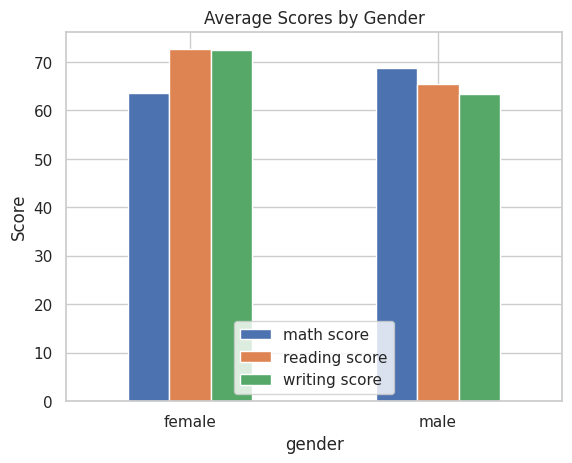

In [28]:
# Bar plot: average scores by gender
avg_scores_gender = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
avg_scores_gender.plot(kind='bar')
plt.title('Average Scores by Gender')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()


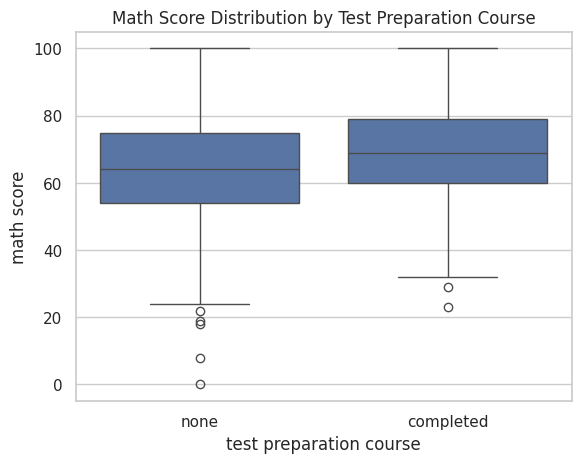

In [29]:
# Boxplot: math scores by test preparation course
sns.boxplot(x='test preparation course', y='math score', data=df)
plt.title('Math Score Distribution by Test Preparation Course')
plt.show()


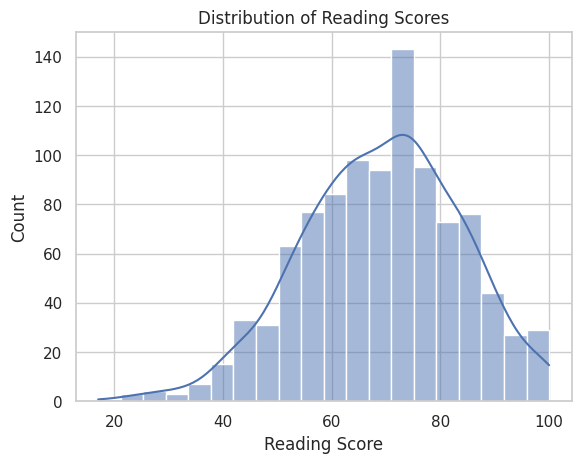

In [30]:
# Histogram: reading score distribution
sns.histplot(df['reading score'], kde=True, bins=20)
plt.title('Distribution of Reading Scores')
plt.xlabel('Reading Score')
plt.show()


## Step 6: Summarize Key Insights

Based on the analysis and visualizations, we can draw the following insights:

- Students who completed the test preparation course scored significantly higher in all subjects.
- Female students scored higher in reading and writing, while male students performed slightly better in math.
- Students with standard lunch performed better than those with free/reduced lunch.
- Parental education level is positively correlated with student performance.

These findings suggest that both academic support and socio-economic factors influence performance.
